**Using Logistic regression model in scikit-learn to predict employee retention**

**Agenda**

1. Perform exploratory data analysis to figure out the variables that have direct and clear  impact on employee retention (i.e whether employees leave the company or continue to work).

2. Build logistic regression model using the variables that were narrowed down in step 1.

3. Measure the accuracy of the model.

4. Test the model on the test data set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.count()

satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
left                     14999
promotion_last_5years    14999
Department               14999
salary                   14999
dtype: int64

In [4]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
#The minimum and maximum satisaction level
df.satisfaction_level.min(), df.satisfaction_level.max()

(0.09, 1.0)

In [6]:
#Status of employees with satisfaction level of 1.0
df.loc[df.satisfaction_level == 1.0, 'left'].value_counts()

0    111
Name: left, dtype: int64

In [7]:
#Status of employees with satisfaction level of 0.9
df.loc[df.satisfaction_level == 0.9, 'left'].value_counts()

0    168
1     52
Name: left, dtype: int64

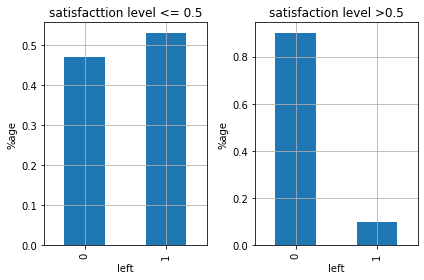

In [8]:
#Barcharts showing the status of employees with satisfaction level less than or equal to 0.5 and greater than 0.5 in percentage
plt.subplot(1,2,1)
df.loc[df.satisfaction_level <=  0.5, 'left'].value_counts(normalize = True).sort_index().plot(kind = 'bar',
                                                                                              grid= True)
plt.title('satisfacttion level <= 0.5')
plt.xlabel('left')
plt.ylabel('%age')
plt.subplot(1,2,2)
df.loc[df.satisfaction_level > 0.5, 'left'].value_counts(normalize = True).sort_index().plot(kind = 'bar',
                                                                                            grid = True)
plt.title('satisfaction level >0.5')
plt.xlabel('left')
plt.ylabel('%age')
plt.tight_layout()
plt.show()

In [9]:
#Minimum and maxamim evaluation
df.last_evaluation.min(), df.last_evaluation.max()

(0.36, 1.0)

In [10]:
#Status of employees with last evaluation of 1.0
df.loc[df.last_evaluation == 1.0, 'left'].value_counts()

1    167
0    116
Name: left, dtype: int64

In [11]:
#Status of employees with last evaluation of 0.36
df.loc[df.last_evaluation == 0.36, 'left'].value_counts()

0    22
Name: left, dtype: int64

In [12]:
df.last_evaluation.median()

0.72

In [13]:
df.loc[df.last_evaluation >=0.72, 'left'].value_counts()

0    5713
1    1893
Name: left, dtype: int64

In [14]:
df.loc[df.last_evaluation < 0.72, 'left'].value_counts()

0    5715
1    1678
Name: left, dtype: int64

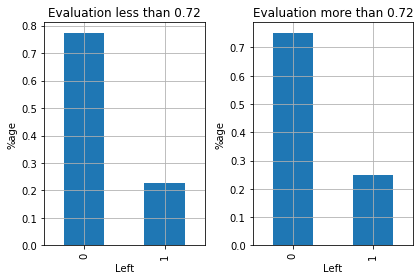

In [15]:
#Barcharts showing the status of employees with last_evaluation less than and greater than or equal to 0.72 in percentage
plt.subplot(1,2,1)
df.loc[df.last_evaluation < 0.72, 'left'].value_counts(normalize = True).sort_index().plot(kind ='bar',
                                                                                          grid = True)
plt.title('Evaluation less than 0.72')
plt.xlabel('Left')
plt.ylabel('%age')
plt.subplot(1,2,2)
df.loc[df.last_evaluation >= 0.72, 'left'].value_counts(normalize = True).sort_index().plot(kind ='bar', 
                                                                                          grid = True)
plt.title('Evaluation more than 0.72')
plt.xlabel('Left')
plt.ylabel('%age')
plt.tight_layout()
plt.show()

In [16]:
#The minimum and maximum number of projects
df.number_project.min(), df.number_project.max()

(2, 7)

In [17]:
#Status of employees with two(2) projects
df.loc[df.number_project ==2, 'left'].value_counts()

1    1567
0     821
Name: left, dtype: int64

In [18]:
#Status of employees with seven(7) projects
df.loc[df.number_project ==7, 'left'].value_counts()

1    256
Name: left, dtype: int64

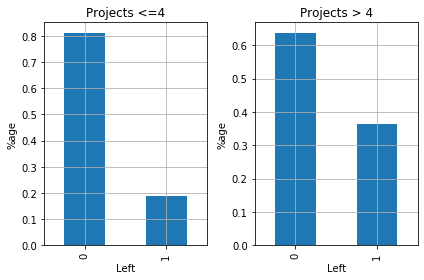

In [19]:
#Barcharts showing status of employees with less than or equal to four(4) projects  and more than four(4) projects
plt.subplot(1,2,1)
df.loc[df.number_project <=4, 'left'].value_counts(normalize = True).sort_index().plot(kind = 'bar', grid = True)
plt.title('Projects <=4')
plt.xlabel('Left')
plt.ylabel('%age')
plt.subplot(1,2,2)
df.loc[df.number_project >4, 'left'].value_counts(normalize = True).sort_index().plot(kind = 'bar', grid = True)
plt.title('Projects > 4')
plt.xlabel('Left')
plt.ylabel('%age')
plt.tight_layout()
plt.show()

In [20]:
#The minimun and maximum average monthly hours
df.average_montly_hours.min(), df.average_montly_hours.max()

(96, 310)

In [21]:
#The mean of avarage monthly hours
df.average_montly_hours.mean()

201.0503366891126

In [22]:
#Status of employees who work for 310 hours
df.loc[df.average_montly_hours == 310, 'left'].value_counts()

1    18
Name: left, dtype: int64

In [23]:
#Status of employees who work for 96 hours
df.loc[df.average_montly_hours == 96, 'left'].value_counts()

0    6
Name: left, dtype: int64

In [24]:
df.loc[df.average_montly_hours >= 160, 'left'].value_counts()

0    8752
1    2043
Name: left, dtype: int64

In [25]:
df.loc[df.average_montly_hours < 160, 'left'].value_counts()

0    2676
1    1528
Name: left, dtype: int64

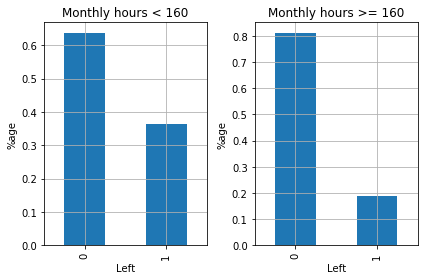

In [26]:
#Barcharts showing ths status of workers with less than 160 hrs and workers with more than or equal to 160 hrs 
plt.subplot(1,2,1)
df.loc[df.average_montly_hours < 160, 'left'].value_counts(normalize = True).sort_index().plot(kind = 'bar',
                                                                                              grid = True)
plt.title('Monthly hours < 160')
plt.xlabel('Left')
plt.ylabel('%age')
plt.subplot(1,2,2)
df.loc[df.average_montly_hours >= 160, 'left'].value_counts(normalize = True).sort_index().plot(kind = 'bar',
                                                                                               grid = True)
plt.title('Monthly hours >= 160')
plt.xlabel('Left')
plt.ylabel('%age')
plt.tight_layout()
plt.show()


In [27]:
#The years spent and number of employees
df.time_spend_company.value_counts().sort_index()

2     3244
3     6443
4     2557
5     1473
6      718
7      188
8      162
10     214
Name: time_spend_company, dtype: int64

In [28]:
#Status of number of employees who spent 10 years
df.loc[df.time_spend_company == 10, 'left'].value_counts()

0    214
Name: left, dtype: int64

In [29]:
#Status of number of employees who spent two(2) years
df.loc[df.time_spend_company ==2, 'left'].value_counts()

0    3191
1      53
Name: left, dtype: int64

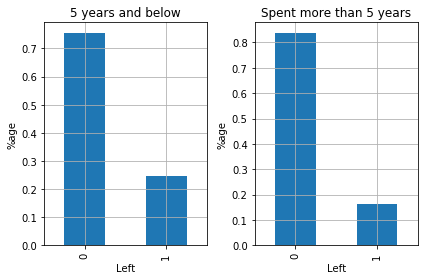

In [30]:
#Barcharts showing status of employees with time_spend_company less than or equal to 5 and more than 5 in percentage
plt.subplot(1,2,1)
df.loc[df.time_spend_company <=5, 'left'].value_counts(normalize = True).sort_index().plot(kind = 'bar',
                                                                                          grid = True)
plt.title('5 years and below')
plt.xlabel('Left')
plt.ylabel('%age')
plt.subplot(1,2,2)
df.loc[df.time_spend_company >5, 'left'].value_counts(normalize = True).sort_index().plot(kind = 'bar', 
                                                                                         grid = True)
plt.title('Spent more than 5 years')
plt.xlabel('Left')
plt.ylabel('%age')
plt.tight_layout()
plt.show()

In [31]:
#Status of employees with work accident
df.Work_accident.value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [32]:
#Status of employees with no work accident
df.loc[df.Work_accident == 0, 'left'].value_counts()

0    9428
1    3402
Name: left, dtype: int64

In [33]:
#Status of employees with work accident
df.loc[df.Work_accident == 1, 'left'].value_counts()

0    2000
1     169
Name: left, dtype: int64

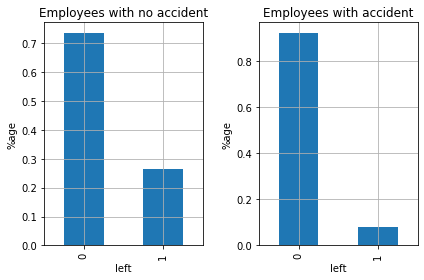

In [34]:
#Barcharts showing status of employees without accident and those with accident in percentage
plt.subplot(1,2,1)
df.loc[df.Work_accident == 0, 'left'].value_counts(normalize = True).sort_index().plot(kind = 'bar', grid = True)
plt.title('Employees with no accident')
plt.xlabel('left')
plt.ylabel('%age')
plt.subplot(1,2,2)
df.loc[df.Work_accident == 1, 'left'].value_counts(normalize = True).sort_index().plot(kind = 'bar', grid = True)
plt.title('Employees with accident')
plt.xlabel('left')
plt.ylabel('%age')
plt.tight_layout()
plt.show()

In [35]:
#Status of employees without and with promotion last five (5) years
df.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [36]:
#Status of employees with no promotion last five(5) years
df.loc[df.promotion_last_5years == 0, 'left'].value_counts()

0    11128
1     3552
Name: left, dtype: int64

In [37]:
#Status of employees with promotion last five(5) years
df.loc[df.promotion_last_5years == 1, 'left'].value_counts()

0    300
1     19
Name: left, dtype: int64

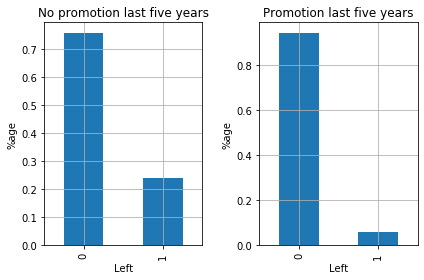

In [38]:
#Barcharts showing status of employees without and with promotion last five (5) years in percentage
plt.subplot(1,2,1)
df.loc[df.promotion_last_5years == 0, 'left'].value_counts(normalize = True).sort_index().plot(kind = 'bar', grid = True)
plt.title('No promotion last five years')
plt.xlabel('Left')
plt.ylabel('%age')
plt.subplot(1,2,2)
df.loc[df.promotion_last_5years == 1, 'left'].value_counts(normalize = True).sort_index().plot(kind = 'bar', grid = True)
plt.title('Promotion last five years')
plt.xlabel('Left')
plt.ylabel('%age')
plt.tight_layout()
plt.show()

In [39]:
#Departments and number of employees
df.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [40]:
#Grouping by department and salary, the status of employees
df.groupby(['Department', 'salary'])[ 'left'].value_counts().head()

Department  salary  left
IT          high    0        79
                    1         4
            low     0       437
                    1       172
            medium  0       438
Name: left, dtype: int64

In [41]:
#Status of employees with low salary
df.loc[df.salary == 'low', 'left'].value_counts()

0    5144
1    2172
Name: left, dtype: int64

In [42]:
#Status of employees with medium salary
df.loc[df.salary == 'medium', 'left'].value_counts()

0    5129
1    1317
Name: left, dtype: int64

In [43]:
#Status of employees with high salary
df.loc[df.salary == 'high', 'left'].value_counts()

0    1155
1      82
Name: left, dtype: int64

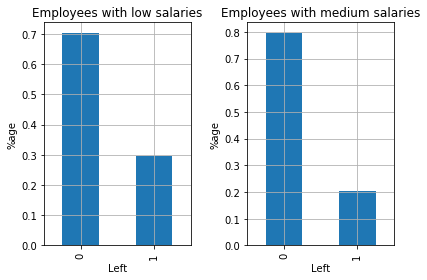

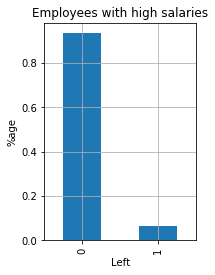

In [44]:
#Barcharts showing the status of employees with low, medium and high salaries in percentage
plt.subplot(1,2,1)
df.loc[df.salary == 'low', 'left'].value_counts(normalize = True).plot(kind = 'bar', grid = True)
plt.title('Employees with low salaries')
plt.xlabel('Left')
plt.ylabel('%age')
plt.subplot(1,2,2)
df.loc[df.salary == 'medium', 'left'].value_counts(normalize = True).plot(kind = 'bar', grid = True)
plt.title('Employees with medium salaries')
plt.xlabel('Left')
plt.ylabel('%age')
plt.tight_layout()
plt.show()
plt.subplot(1,2,1)
df.loc[df.salary == 'high', 'left'].value_counts(normalize = True).plot(kind = 'bar', grid = True)
plt.title('Employees with high salaries')
plt.xlabel('Left')
plt.ylabel('%age')
plt.show()

In [45]:
#Transform salary into numbers
df.loc[df.salary == 'low', 'salary'] = 0
df.loc[df.salary == 'medium', 'salary'] = 1
df.loc[df.salary == 'high', 'salary'] = 2

In [46]:
corr = df.corr()

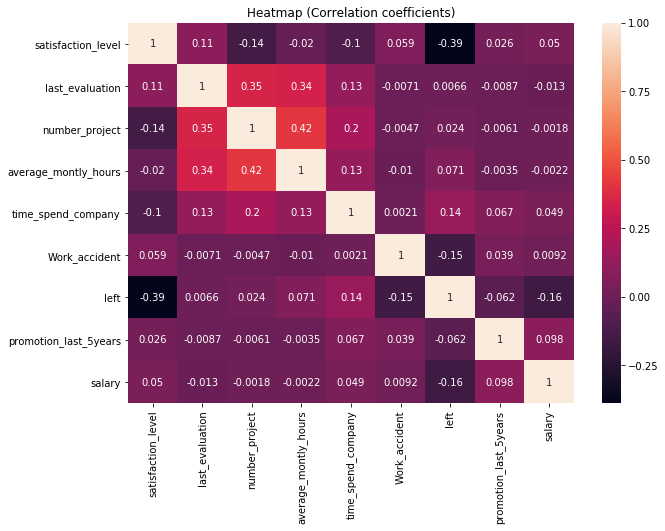

In [47]:
plt.figure(figsize = (10, 7))
sns.heatmap(corr, annot = True, color = 'yellow')
plt.title('Heatmap (Correlation coefficients)')
plt.show()

**The model**

In [48]:
X = df[['satisfaction_level', 'average_montly_hours', 'number_project', 'salary']]
y = df['left']

In [49]:
#Split the data set into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [50]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11999, 4), (3000, 4), (11999,), (3000,))

In [51]:
#Using logistic regression to fit the training data  
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\-\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
#The accuracy of the model on the test data set
model.score(x_test,y_test)

0.797

In [53]:
#Predicting the test set data
y_pred = model.predict(x_test)

In [54]:
#The length of predicted set data
len(y_pred)

3000

**Testing the accuracy of the model on the predicted data set**

In [55]:
#First five (5) rows on the test data set
x_test[:5]

,satisfaction_level,average_montly_hours,number_project,salary
6493,0.77,162,5,2
3568,0.96,210,4,1
972,0.11,290,6,1
3260,0.58,220,3,1
671,0.11,264,6,0


In [56]:
#First five (5) predictions on the test data set
y_pred[:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [57]:
#Checking the probability of the employees (first five(5)) whether they stay or leave
model.predict_proba(x_test[:5])

array([[0.96992492, 0.03007508],
       [0.95705937, 0.04294063],
       [0.43130858, 0.56869142],
       [0.78620993, 0.21379007],
       [0.30877982, 0.69122018]])

In [58]:
#To check...
df.loc[[6493, 3568, 972, 3260, 671]]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
6493,0.77,0.57,5,162,3,0,0,0,marketing,2
3568,0.96,0.71,4,210,3,0,0,0,technical,1
972,0.11,0.74,6,290,5,0,1,0,technical,1
3260,0.58,0.76,3,220,3,0,0,0,support,1
671,0.11,0.94,6,264,4,0,1,0,IT,0


From the table above,it is realised that the prediction for the first five employees on the test data set was accurate.
Since the model's accuracy is 79%, we use confusion matrix to check the weakness of the model (i.e where our model is not doing well).


In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


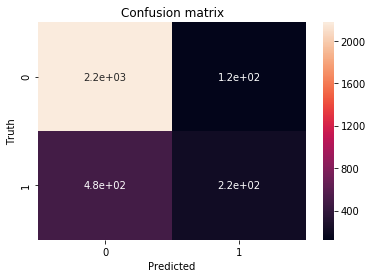

In [60]:
sns.heatmap(cm, annot = True)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()